In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
plt.style.use('ggplot')



In [2]:
def set_ax_style(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_linewidth(1.0)


    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()   
    for label in ticklabels:
        label.set_fontsize(15)

# Resultados para um nó

In [3]:
names = ["Id", "Caso", "Tipo", "Processos/Threads" ,"TempoTotal", "TempoEncontrarMinimo", "TempoSincronizar", "TempoSwap", "Iteracoes", "CustoCalc", "CustoOtimo", "Lixo"]
data = pd.read_csv("NewResults/resultados_random_umno.txt", sep=";", header=None, names=names)
names = names[1:-1]


In [4]:
data

,Id,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo,Lixo
0,15043897706000082986396,../../ALL_tsp/att48.tsp,MPI,1,4.336914,4.159668,0.160400,0.103027,47,34233.095557,33523.708507,NaN
1,15043897711000084101485,../../ALL_tsp/att48.tsp,OpenMP,1,3.977051,3.811035,0.131836,0.086670,43,34147.149110,33523.708507,NaN
2,1504389771500003330824,../../ALL_tsp/att48.tsp,MPI,2,2.675049,2.077393,0.560547,0.097656,46,35096.683724,33523.708507,NaN
3,15043897711000084451712,../../ALL_tsp/att48.tsp,OpenMP,2,2.262939,1.984863,0.246338,0.112305,43,34147.149110,33523.708507,NaN
4,1504389771500003791541,../../ALL_tsp/att48.tsp,MPI,4,1.996094,1.093262,0.872314,0.094238,46,35096.683724,33523.708507,NaN
5,15043897721000076148889,../../ALL_tsp/att48.tsp,OpenMP,4,1.375977,1.114014,0.241943,0.105225,46,34394.421043,33523.708507,NaN
6,15043897726000027718989,../../ALL_tsp/att48.tsp,MPI,8,1.889893,0.569092,1.296143,0.107422,44,36957.643050,33523.708507,NaN
7,15043897725000076861774,../../ALL_tsp/att48.tsp,OpenMP,8,1.105957,0.622070,0.466064,0.115967,46,34394.421043,33523.708507,NaN
8,15043897738000029949107,../../ALL_tsp/att48.tsp,MPI,16,1.849854,0.359131,1.441895,0.095947,48,35827.511863,33523.708507,NaN
9,1504389774100000038172841,../../ALL_tsp/att48.tsp,OpenMP,16,51.144043,0.321289,50.785889,0.098145,42,34993.040583,33523.708507,NaN


In [5]:
data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
data.Tipo = data.Tipo.apply(lambda x: x.strip())
casos = data.Caso.unique()
tipos = data.Tipo.unique()
print casos
print names

['att48' 'rd100' 'pr1002' 'pcb442']
['Caso', 'Tipo', 'Processos/Threads', 'TempoTotal', 'TempoEncontrarMinimo', 'TempoSincronizar', 'TempoSwap', 'Iteracoes', 'CustoCalc', 'CustoOtimo']


In [6]:
mean_data = data[names]
mean_data = mean_data.groupby(names[0:3], as_index=False).mean()
mean_data["TempoSincronizar"] = mean_data["TempoSincronizar"] - mean_data["TempoSwap"]
mean_data[:5]


,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo
0,att48,MPI,1,4.093823,3.932446,0.055469,0.088330,44.3,34817.695593,33523.708507
1,att48,MPI,2,2.515747,1.942529,0.459033,0.090796,42.9,35161.449339,33523.708507
2,att48,MPI,4,1.943286,1.048267,0.777710,0.090381,44.1,35021.863696,33523.708507
3,att48,MPI,8,1.936304,0.577026,1.240063,0.090430,44.6,35123.831301,33523.708507
4,att48,MPI,16,1.827661,0.351807,1.350342,0.097241,46.4,34902.876073,33523.708507


In [7]:
std_data = data.groupby(names[0:3], as_index=True).std()
for name in names[3:]:
    key = "%s (std)" % name
    mean_data[key.strip()] = np.array(std_data[name])

mean_data[mean_data.Caso=="att48"]

,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo,TempoTotal (std),TempoEncontrarMinimo (std),TempoSincronizar (std),TempoSwap (std),Iteracoes (std),CustoCalc (std),CustoOtimo (std)
0,att48,MPI,1,4.093823,3.932446,0.055469,0.088330,44.3,34817.695593,33523.708507,0.308594,0.297567,0.012818,0.008709,3.368151,534.760329,0.0
1,att48,MPI,2,2.515747,1.942529,0.459033,0.090796,42.9,35161.449339,33523.708507,0.145808,0.118979,0.034788,0.006666,2.558211,406.892774,0.0
2,att48,MPI,4,1.943286,1.048267,0.777710,0.090381,44.1,35021.863696,33523.708507,0.137635,0.056902,0.078139,0.006292,2.424413,430.373920,0.0
3,att48,MPI,8,1.936304,0.577026,1.240063,0.090430,44.6,35123.831301,33523.708507,0.113232,0.032240,0.083461,0.007372,2.547330,731.897329,0.0
4,att48,MPI,16,1.827661,0.351807,1.350342,0.097241,46.4,34902.876073,33523.708507,0.068144,0.022385,0.053627,0.008859,2.412928,591.190474,0.0
5,att48,OpenMP,1,4.198193,4.031738,0.046582,0.089966,45.4,34715.680978,33523.708507,0.186663,0.183086,0.006719,0.004625,2.011080,482.049724,0.0
6,att48,OpenMP,2,2.352978,2.063696,0.144092,0.113257,44.4,34772.452501,33523.708507,0.170708,0.148134,0.029062,0.010631,3.204164,816.560785,0.0
7,att48,OpenMP,4,1.350391,1.047241,0.172266,0.103906,42.7,34660.351277,33523.708507,0.082717,0.070348,0.020805,0.007597,3.020302,746.216633,0.0
8,att48,OpenMP,8,20.270532,0.582031,19.551318,0.109131,43.6,34710.272953,33523.708507,60.502643,0.083720,60.565035,0.009889,2.716207,551.479385,0.0
9,att48,OpenMP,16,17.666113,0.347070,17.176392,0.109033,45.0,34973.090194,33523.708507,16.510347,0.017471,16.519332,0.005735,1.943651,499.841670,0.0


In [8]:
results={}

for caso in mean_data["Caso"].unique():
    results[caso] = pd.DataFrame(mean_data[mean_data.Caso == caso])

/home/mateus/Development/multigrid/mg_env/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


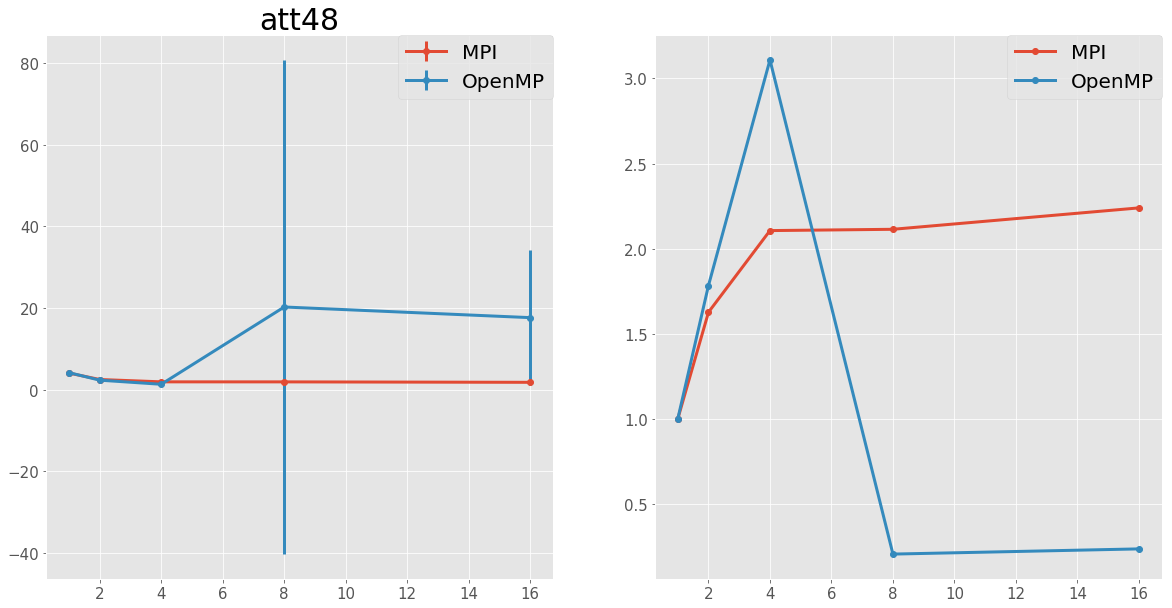

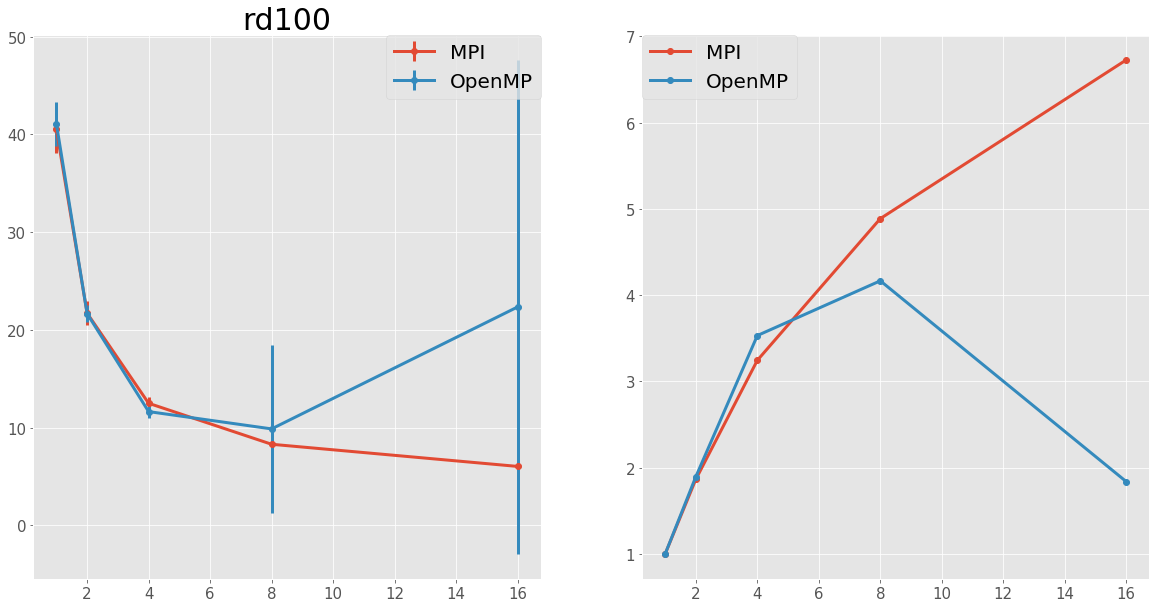

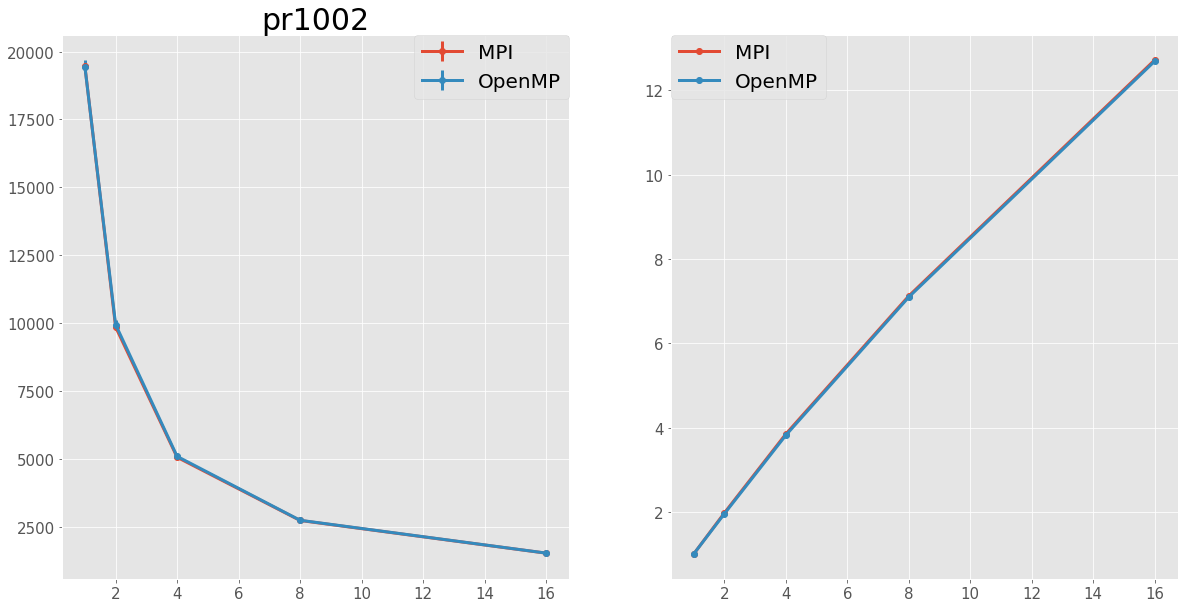

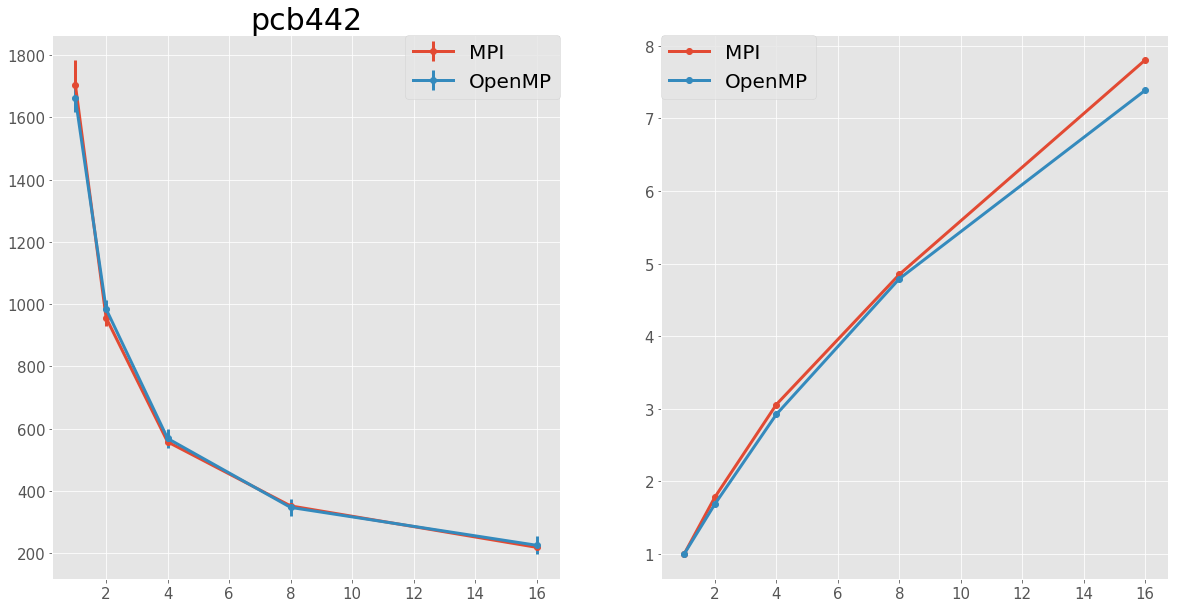

In [9]:
for i, caso in enumerate(casos):
    r = results[caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI"]["TempoTotal"])
    tempoMPIstd = np.array(r[r.Tipo=="MPI"]["TempoTotal (std)"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["TempoTotal"])
    if( len(tempoOpenMP) > 0):
        tempoOpenMPstd = np.array(r[r.Tipo=="OpenMP"]["TempoTotal (std)"])
        speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]
    
    
    axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label="MPI", yerr=tempoMPIstd)
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI")
    if( len(tempoOpenMP) > 0):    
        axis[0].errorbar(procs, tempoOpenMP, yerr=tempoOpenMPstd, marker="o", lw=3, label="OpenMP")
        axis[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="OpenMP")
    
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title(caso, fontsize=30)

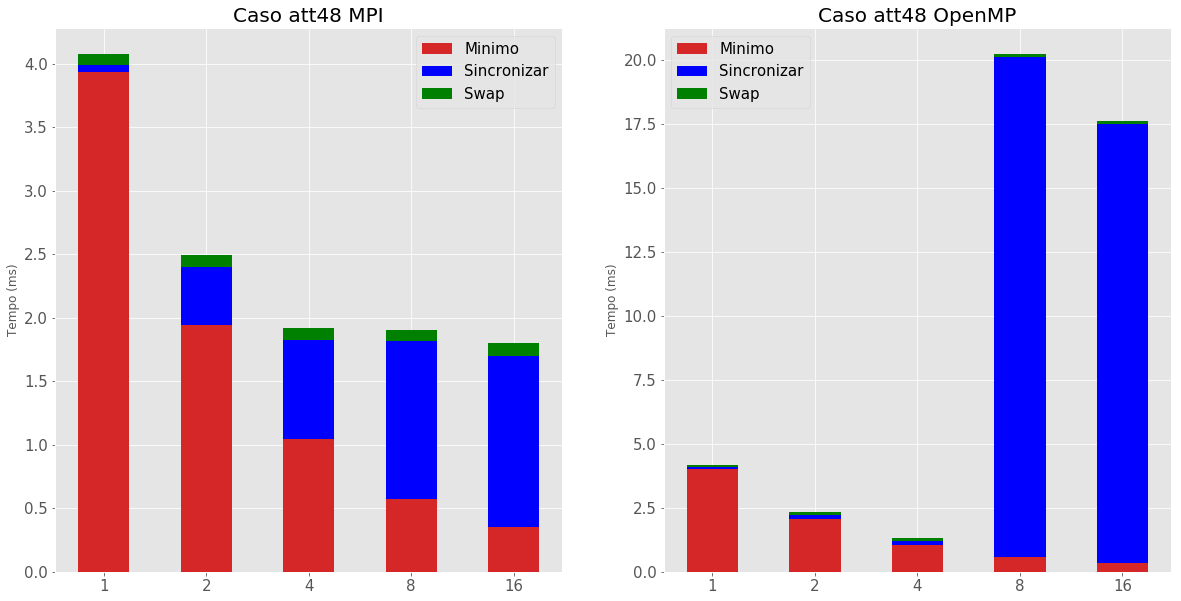

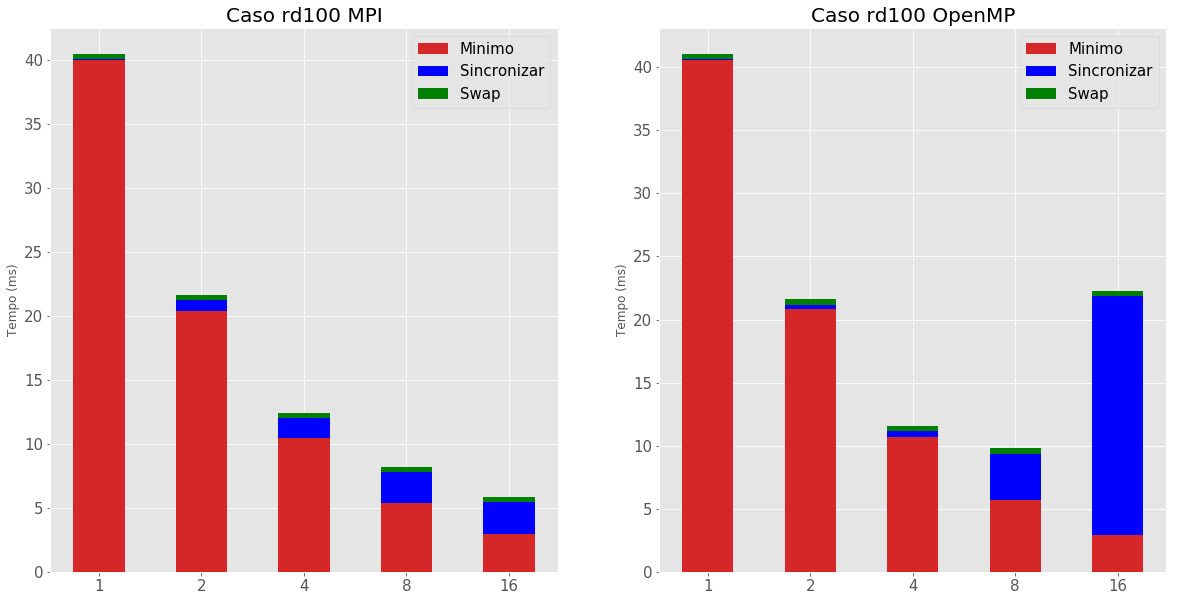

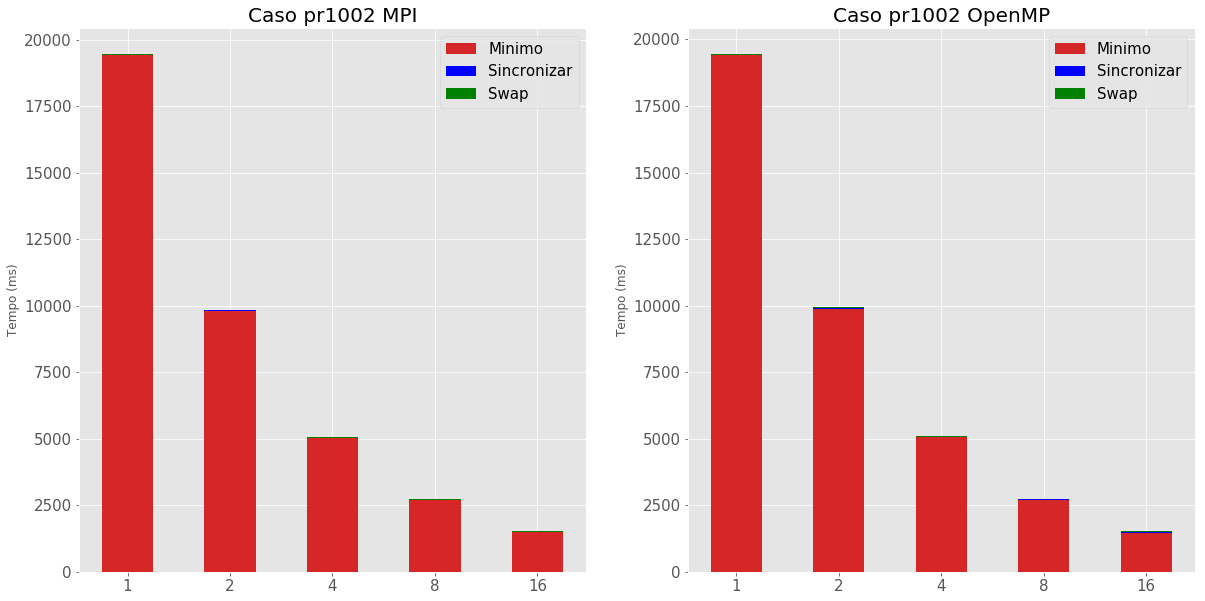

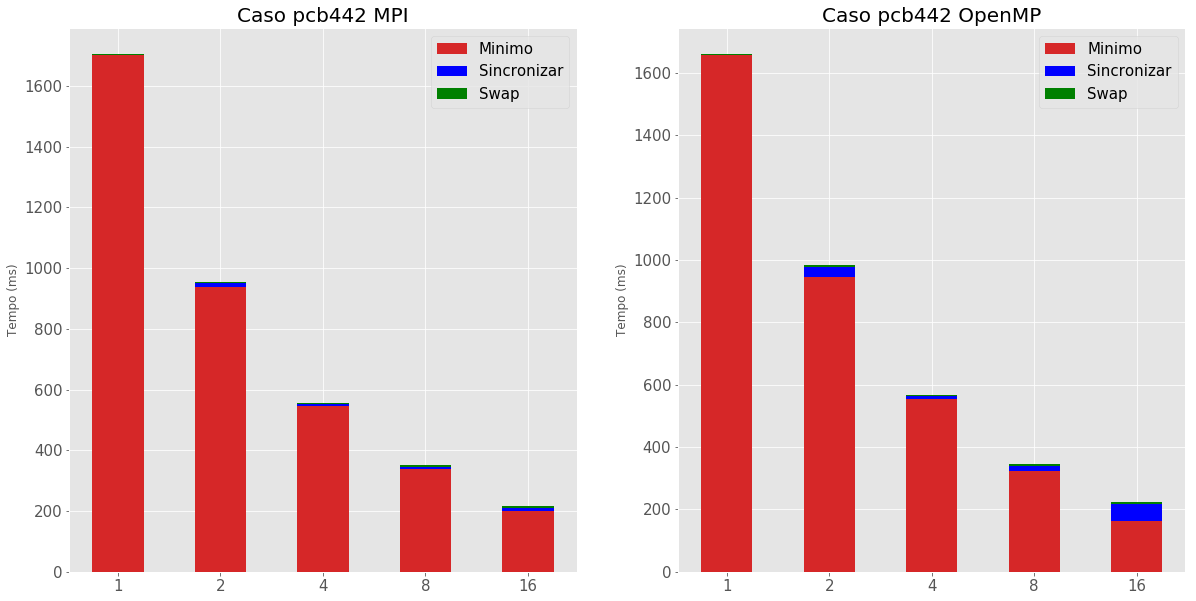

In [10]:
for caso in casos:
    fig, axis = plt.subplots(1,2, figsize=(20,10))

    for iax,tipo in enumerate(tipos):
        set_ax_style(axis[iax])
        width = 0.5       # the width of the bars: can also be len(x) sequence

        r = results[caso]
        procs = r[r.Tipo==tipo]["Processos/Threads"]

        # positions of the left bar-boundaries
        bar_l = [i+1 for i in range(len(procs))]

        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(width/2) for i in bar_l]   

        tempoEncMinMPI = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo"])
        tempoEncMinMPIStd = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo (std)"])

        tempoSincMPI = np.array(r[r.Tipo==tipo]["TempoSincronizar"])
        tempoSincMPIStd= np.array(r[r.Tipo==tipo]["TempoSincronizar (std)"])

        tempoSwapMPI = np.array(r[r.Tipo==tipo]["TempoSwap"])
        tempoSwapMPIStd= np.array(r[r.Tipo==tipo]["TempoSwap (std)"])

        ind = np.arange(len(procs))    # the x locations for the groups

        axis[iax].set_xticks(ind)
        axis[iax].set_xticklabels(tuple(procs))

        p1 = axis[iax].bar(ind, tempoEncMinMPI, width, color='#d62728')
        p2 = axis[iax].bar(ind, tempoSincMPI, width,
                     bottom=tempoEncMinMPI, color="blue")
        p3 = axis[iax].bar(ind, tempoSwapMPI, width,
                     bottom=tempoSincMPI+tempoEncMinMPI, color="green")

        axis[iax].legend(loc='upper left')
        axis[iax].set_ylabel('Tempo (ms)')
        axis[iax].set_title('Caso %s %s' % (caso, tipo), fontsize=20)

        axis[iax].legend((p1[0], p2[0], p3[0]), ('Minimo', 'Sincronizar', 'Swap'), fontsize=15)    

    plt.show()



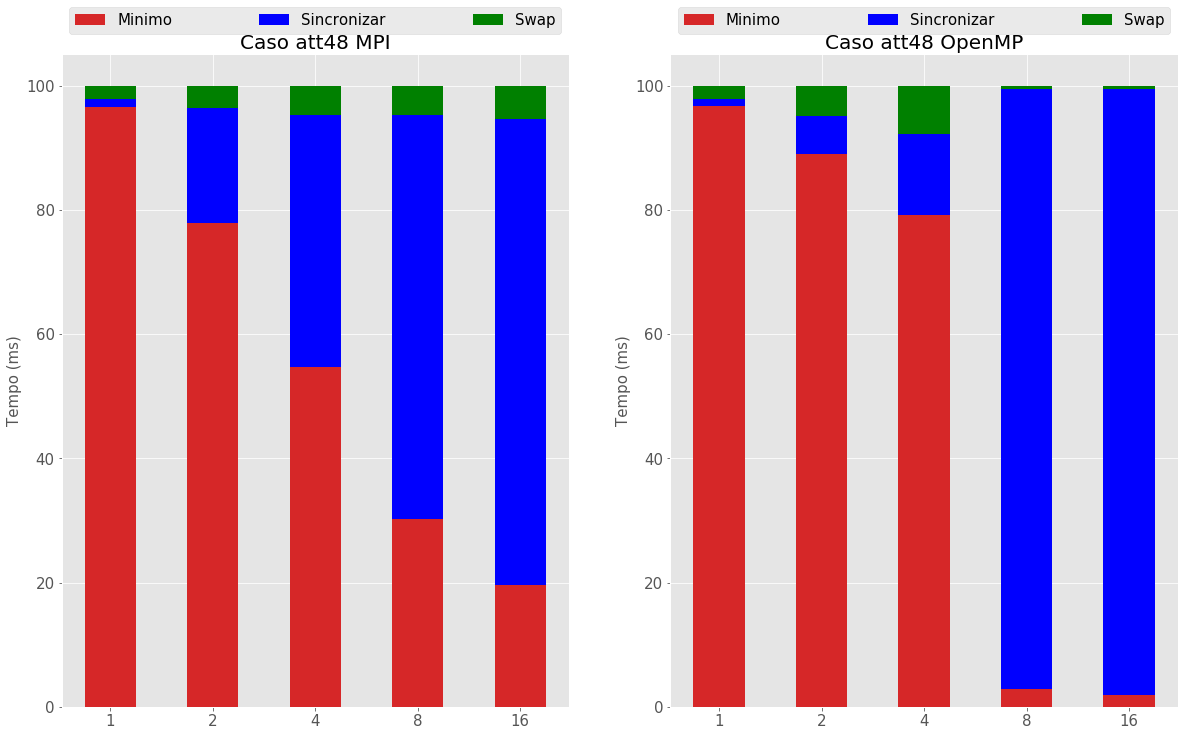

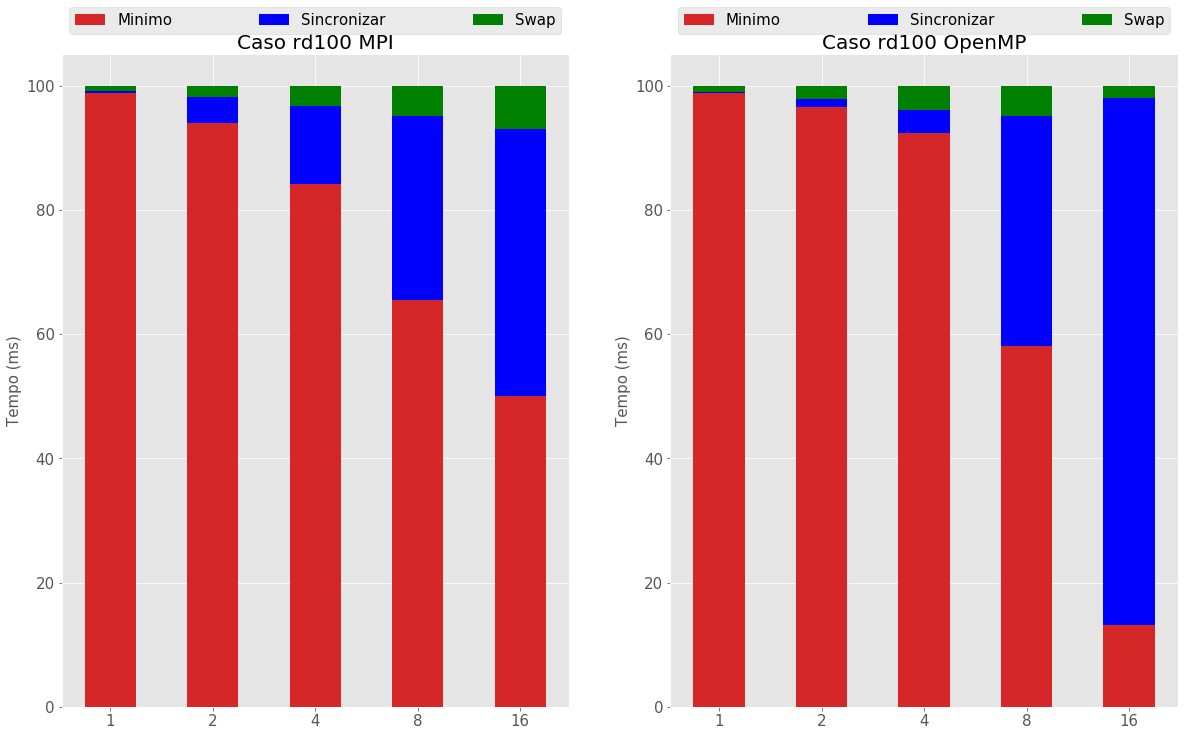

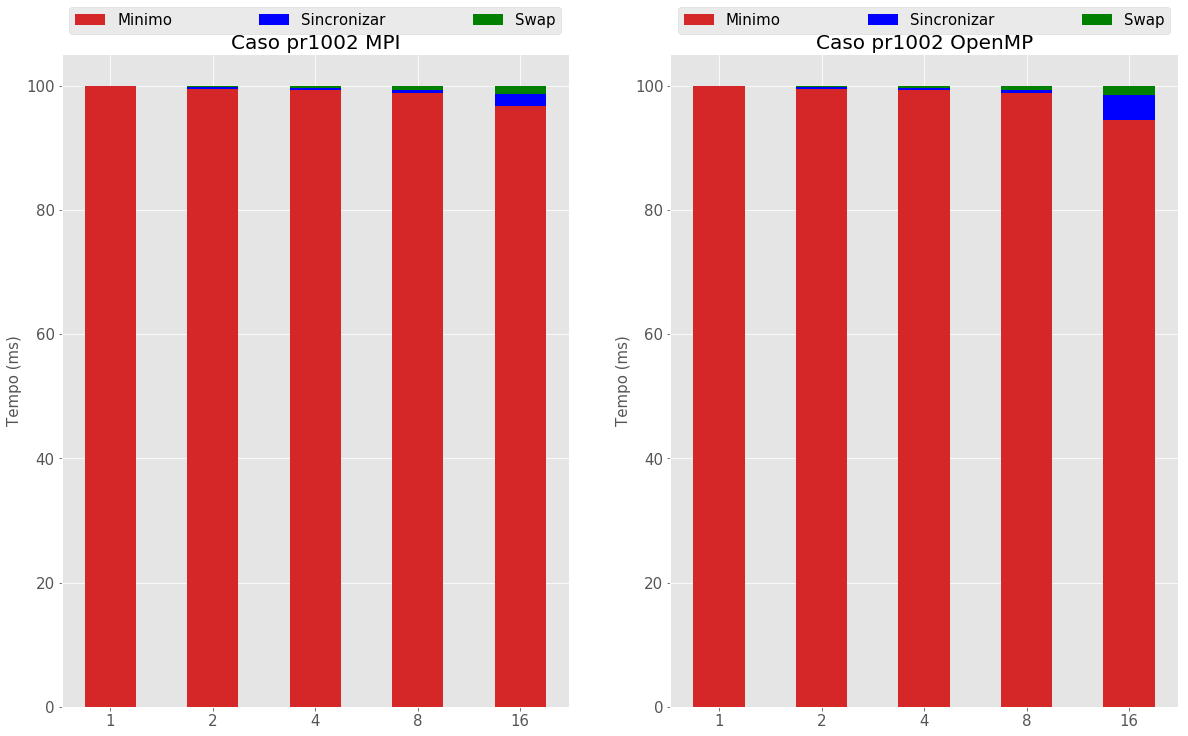

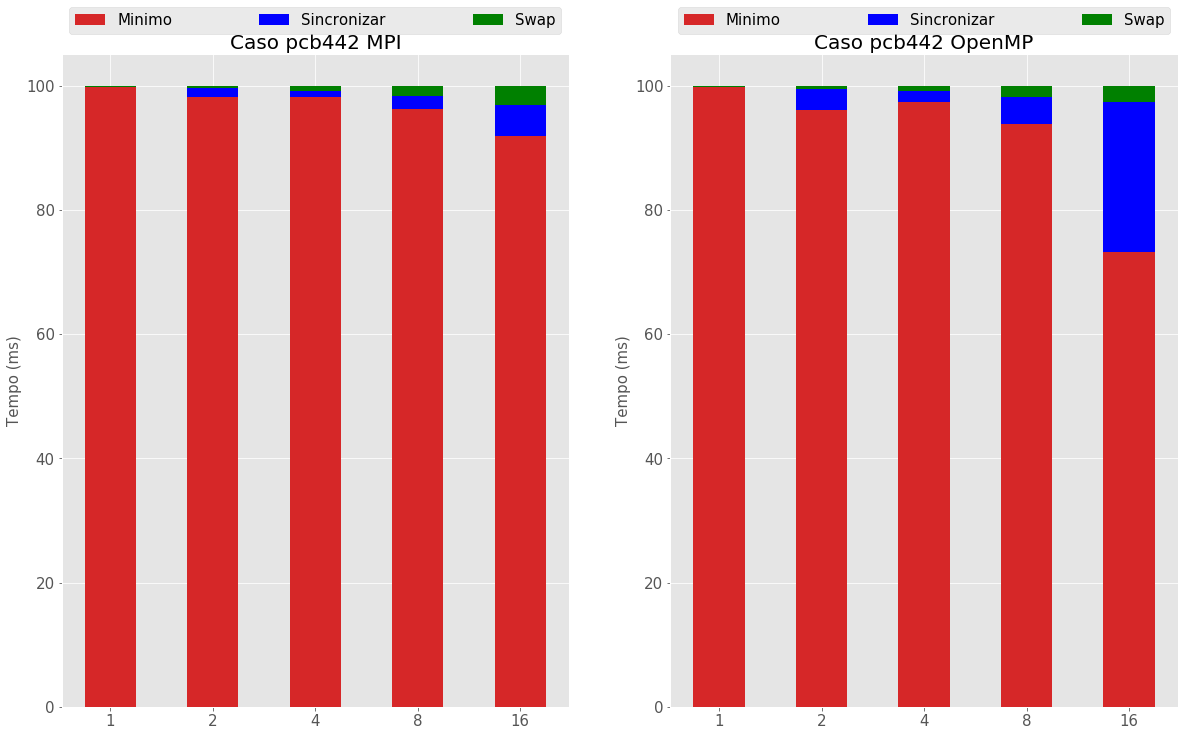

In [11]:
for caso in casos:
    fig, axis = plt.subplots(1,2, figsize=(20,12))

    for iax,tipo in enumerate(tipos):
        set_ax_style(axis[iax])
        width = 0.5       # the width of the bars: can also be len(x) sequence

        r = results[caso]
        procs = r[r.Tipo==tipo]["Processos/Threads"]

        # positions of the left bar-boundaries
        bar_l = [i+1 for i in range(len(procs))]

        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(width/2) for i in bar_l]   

        tempoEncMinMPI = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo"])

        tempoSincMPI = np.array(r[r.Tipo==tipo]["TempoSincronizar"])

        tempoSwapMPI = np.array(r[r.Tipo==tipo]["TempoSwap"])

        tempoTotal = tempoEncMinMPI + tempoSincMPI + tempoSwapMPI
        
        tempoEncMinMPI = 100*tempoEncMinMPI/tempoTotal
        tempoSincMPI = 100*tempoSincMPI/tempoTotal
        tempoSwapMPI = 100*tempoSwapMPI/tempoTotal
        
        
        ind = np.arange(len(procs))    # the x locations for the groups

        axis[iax].set_xticks(ind)
        axis[iax].set_xticklabels(tuple(procs))

        p1 = axis[iax].bar(ind, tempoEncMinMPI, width, color='#d62728')
        p2 = axis[iax].bar(ind, tempoSincMPI, width,
                     bottom=tempoEncMinMPI, color="blue")
        p3 = axis[iax].bar(ind, tempoSwapMPI, width,
                     bottom=tempoSincMPI+tempoEncMinMPI, color="green")

        axis[iax].set_ylabel('Tempo (ms)', fontsize=15)
        axis[iax].set_ylabel('Tempo (ms)', fontsize=15)
        axis[iax].set_title('Caso %s %s' % (caso, tipo), fontsize=20)

        axis[iax].legend((p1[0], p2[0], p3[0]), ('Minimo', 'Sincronizar', 'Swap'), fontsize=15, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", ncol=len(procs))    

    plt.show()